C:\Users\BAHU Computers\AppData\Local\Temp\ipykernel_17332\1955930364.py:37: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x="age_group", y="survived", ci=None, ax=axes[0,1], palette="coolwarm")


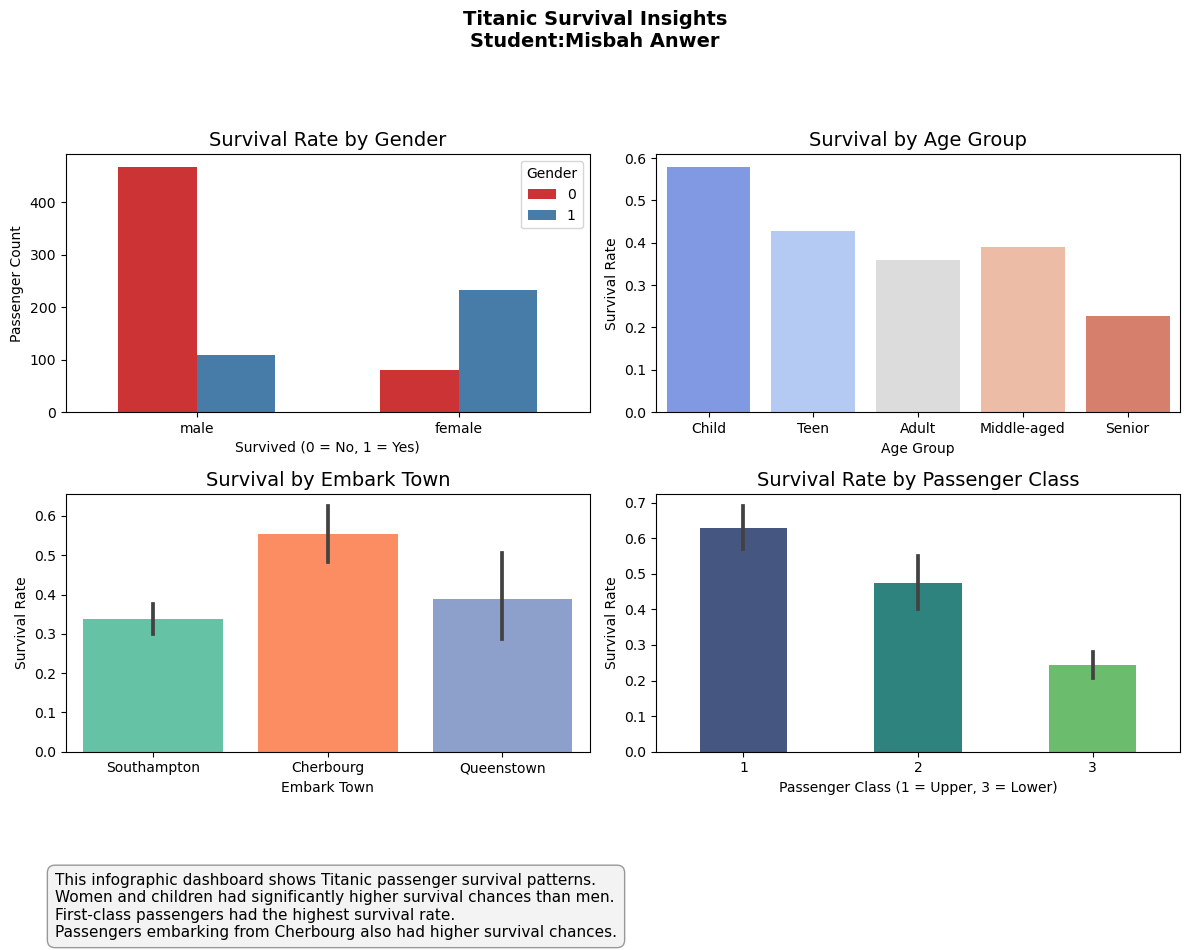

In [17]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
# ------------------------- 
# Load and preprocess data 
# ------------------------- 

df = sns.load_dataset("titanic") 
# Clean dataset 
df.drop(["deck", "embarked"], axis=1, inplace=True) 
df["age"].fillna(df["age"].mean(), inplace=True) 
df["embark_town"].fillna(df["embark_town"].mode()[0], inplace=True)

# ------------------------- 
# Create infographic layout 
# ------------------------- 
fig, axes = plt.subplots(2, 2, figsize=(12, 10)) 
plt.subplots_adjust(left=0.05, right=0.95, top=0.92, bottom=0.18, hspace=0.35, wspace=0.3)
fig.suptitle("Titanic Survival Insights\nStudent:Misbah Anwer", fontsize=14, weight="bold", y=0.95)

# -------------------------
# Plot 1: Survival by Gender 
# ------------------------- 
sns.countplot(data=df, x="sex", ax=axes[0,0], hue="survived", width=0.6, palette="Set1") 
axes[0,0].set_title("Survival Rate by Gender", fontsize=14) 
axes[0,0].set_xlabel("Survived (0 = No, 1 = Yes)") 
axes[0,0].set_ylabel("Passenger Count") 
axes[0,0].legend(title="Gender")

# ------------------------- 
# Plot 2: Survival Rate by Age Group 
# (grouped barplot) 
# ------------------------- 

df["age_group"] = pd.cut(df["age"], bins=[0,12,18,40,60,80], labels=["Child","Teen","Adult","Middle-aged","Senior"])
sns.barplot(data=df, x="age_group", y="survived", ci=None, ax=axes[0,1], palette="coolwarm") 
axes[0,1].set_title("Survival by Age Group", fontsize=14) 
axes[0,1].set_xlabel("Age Group") 
axes[0,1].set_ylabel("Survival Rate")
# ------------------------- 
# Plot 3: Survival by Embark Town 
# ------------------------- 
sns.barplot(data=df, x="embark_town", y="survived", ax=axes[1,0], palette="Set2", saturation=15) 
axes[1,0].set_title("Survival by Embark Town", fontsize=14) 
axes[1,0].set_xlabel("Embark Town") 
axes[1,0].set_ylabel("Survival Rate") 

# ------------------------- 
# Plot 4: Survival by Passenger Class 
# ------------------------- 
sns.barplot(data=df, x="pclass", y="survived", ax=axes[1,1], width=0.5, palette="viridis") 
axes[1,1].set_title("Survival Rate by Passenger Class", fontsize=14) 
axes[1,1].set_xlabel("Passenger Class (1 = Upper, 3 = Lower)") 
axes[1,1].set_ylabel("Survival Rate")
# Final adjustments 
# ------------------------- 
# Leave more vertical space (top for title, bottom for story) 
plt.tight_layout(rect=[0, 0.15, 1, 0.9]) 

# Add main explanatory story at the bottom

fig.text(0.05, 0.02,
         "This infographic dashboard shows Titanic passenger survival patterns.\n"
         "Women and children had significantly higher survival chances than men.\n"
         "First-class passengers had the highest survival rate.\n"
         "Passengers embarking from Cherbourg also had higher survival chances.",
         ha="left", fontsize=11, va="bottom",
         bbox=dict(boxstyle="round,pad=0.5", facecolor="#f0f0f0", edgecolor="gray", alpha=0.8))
plt.savefig("Tita.png", dpi=300)
plt.show()

